In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential

In [2]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
import random 

random.seed(0)

**Data Preprocessing**

0


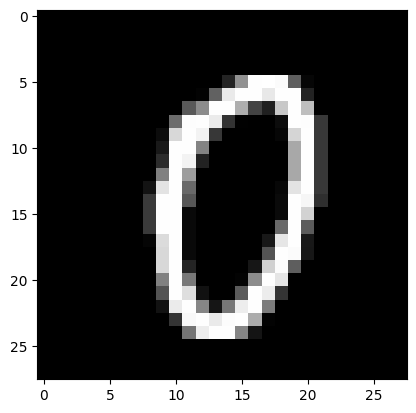

In [4]:
print(y_train[1000])
plt.imshow(X_train[1000], cmap='gray')

In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [8]:
print(X_train.min(), X_train.max())
print(X_test.min(), X_test.max())

0.0 1.0
0.0 1.0


In [9]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [10]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(50, activation='tanh'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
result = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 18s 9ms/step - loss: 0.1563 - accuracy: 0.9539 - val_loss: 0.0865 - val_accuracy: 0.9753
Epoch 2/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0502 - accuracy: 0.9850 - val_loss: 0.0696 - val_accuracy: 0.9800
Epoch 3/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0290 - accuracy: 0.9912 - val_loss: 0.0679 - val_accuracy: 0.9826
Epoch 4/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0192 - accuracy: 0.9943 - val_loss: 0.0698 - val_accuracy: 0.9826
Epoch 5/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0112 - accuracy: 0.9964 - val_loss: 0.0681 - val_accuracy: 0.9849
Epoch 6/10
1313/1313 [==============================] - 7s 6ms/step - loss: 0.0074 - accuracy: 0.9978 - val_loss: 0.0714 - val_accuracy: 0.9853
Epoch 7/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0043 - accuracy: 0.9988 - val_loss: 0.0782 - val_accuracy

In [12]:
loss, acc = model.evaluate(X_train, y_train)
print(acc * 100)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0253 - accuracy: 0.9958
99.58333373069763


In [13]:
loss, acc = model.evaluate(X_test, y_test)
print(acc * 100)

313/313 [==============================] - 1s 3ms/step - loss: 0.0623 - accuracy: 0.9878
98.78000020980835


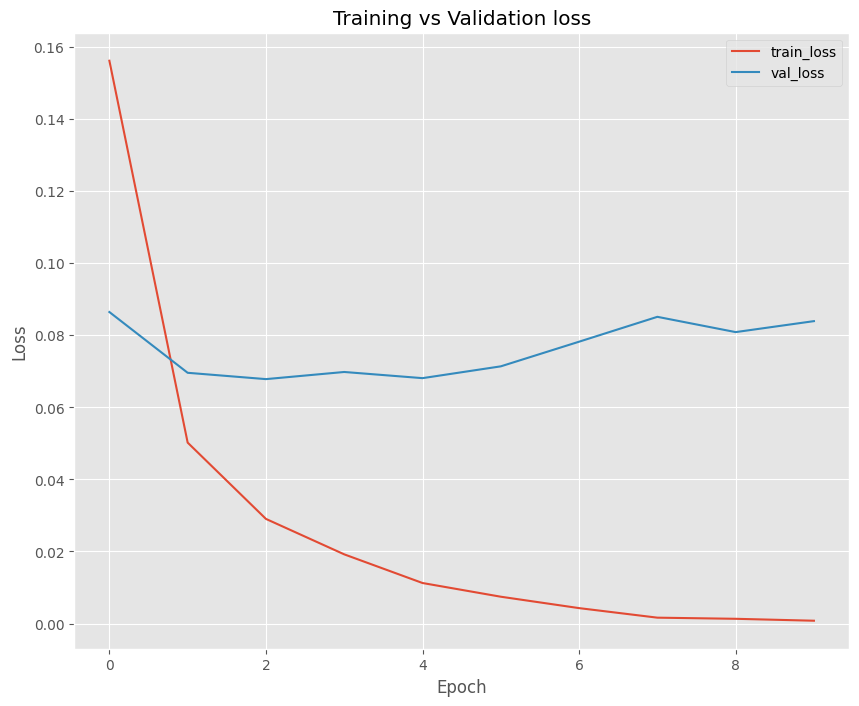

In [14]:
epochs = np.arange(0, len(result.history['loss']))
plt.figure(figsize=(10, 8))
plt.style.use('ggplot')

plt.plot(epochs, result.history['loss'], label='train_loss')
plt.plot(epochs, result.history['val_loss'], label='val_loss')
plt.title('Training vs Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Max pooling + Dropout

In [15]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(50, activation='tanh'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
result = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 10s 6ms/step - loss: 0.1690 - accuracy: 0.9518 - val_loss: 0.0745 - val_accuracy: 0.9789
Epoch 2/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0539 - accuracy: 0.9837 - val_loss: 0.0565 - val_accuracy: 0.9834
Epoch 3/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0354 - accuracy: 0.9893 - val_loss: 0.0485 - val_accuracy: 0.9864
Epoch 4/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0258 - accuracy: 0.9922 - val_loss: 0.0536 - val_accuracy: 0.9849
Epoch 5/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0207 - accuracy: 0.9932 - val_loss: 0.0591 - val_accuracy: 0.9845
Epoch 6/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0162 - accuracy: 0.9947 - val_loss: 0.0517 - val_accuracy: 0.9857
Epoch 7/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0160 - accuracy: 0.9947 - val_loss: 0.0576 - val_accuracy

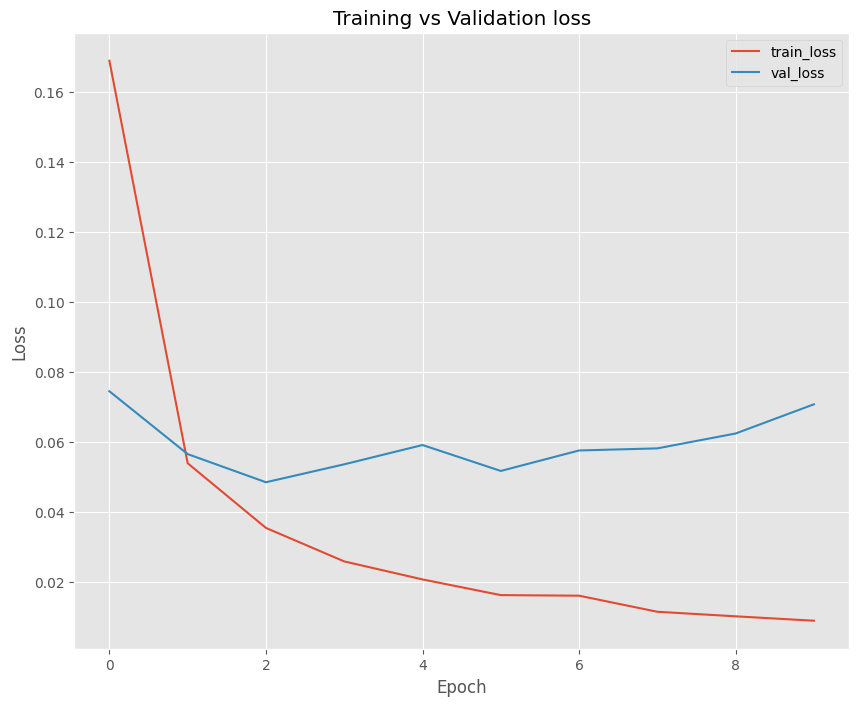

In [17]:
epochs = np.arange(0, len(result.history['loss']))
plt.figure(figsize=(10, 8))
plt.style.use('ggplot')

plt.plot(epochs, result.history['loss'], label='train_loss')
plt.plot(epochs, result.history['val_loss'], label='val_loss')
plt.title('Training vs Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(50, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [19]:
callbacks = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=2,
    min_delta=0.02
)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
result = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.3, callbacks=callbacks)

Epoch 1/10
1313/1313 [==============================] - 10s 6ms/step - loss: 0.2584 - accuracy: 0.9240 - val_loss: 0.0762 - val_accuracy: 0.9778
Epoch 2/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0881 - accuracy: 0.9745 - val_loss: 0.0612 - val_accuracy: 0.9814
Epoch 3/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0634 - accuracy: 0.9823 - val_loss: 0.0581 - val_accuracy: 0.9818


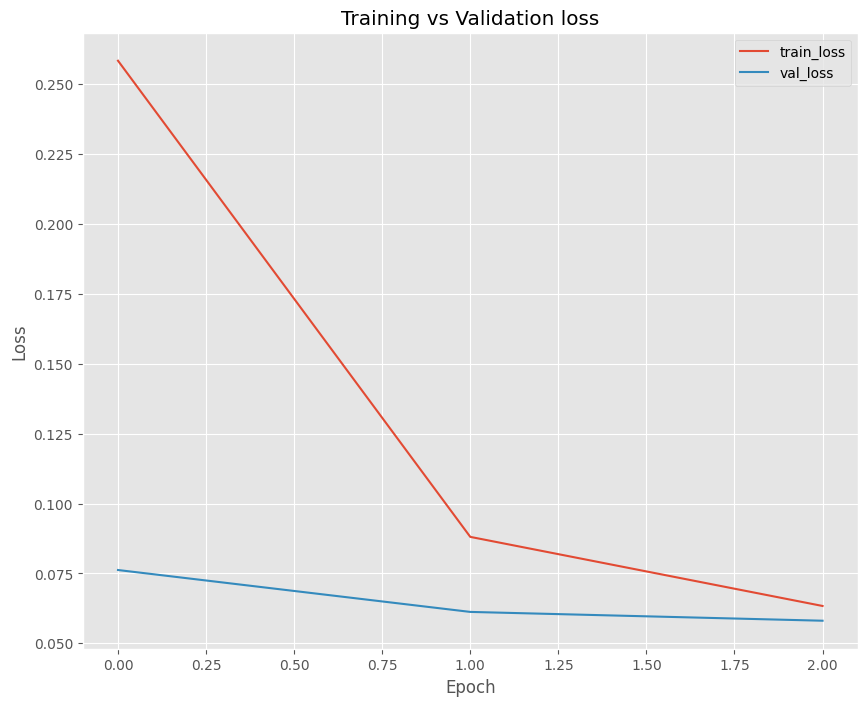

In [20]:
epochs = np.arange(0, len(result.history['loss']))
plt.figure(figsize=(10, 8))
plt.style.use('ggplot')

plt.plot(epochs, result.history['loss'], label='train_loss')
plt.plot(epochs, result.history['val_loss'], label='val_loss')
plt.title('Training vs Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 182ms/step
6
[[3.2660624e-05 1.7032876e-07 1.5391672e-06 5.4137132e-07 2.2484322e-05
  1.0609948e-05 9.9992335e-01 1.9812578e-09 7.7588284e-06 7.8261837e-07]]
0.9999999


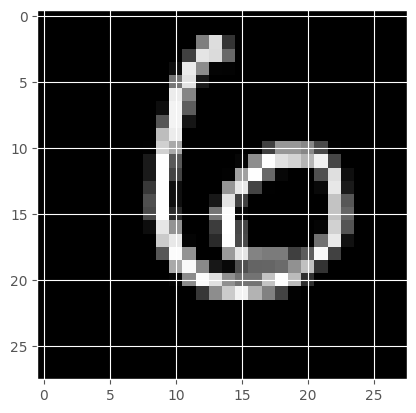

In [22]:
plt.imshow(X_test[100], cmap='gray')
y_pred = model.predict(X_test[100].reshape(1, 28, 28, 1))
print(y_pred.argmax())
print(y_pred)
print(y_pred.sum())